# Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!



# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [180]:
#!pip install openweathermapy

In [208]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import requests
import time
import urllib

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [209]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [210]:
# Check each city to see which API call is successful and only append those to the updated_cities.
# use exception/try handling
url = "http://api.openweathermap.org/data/2.5/weather?"
record = 1
updated_cities = []
for city in cities:
    print(f" Processing Record {record} City: {city}")
    query_url = url + "appid=" + api_key + "&q=" + city    

    try:
        response = requests.get(query_url,timeout=3)
        response.raise_for_status()
        updated_cities.append(city)
        #put the record count in here so it is not counted for error record.
        record = record + 1
    except requests.exceptions.HTTPError as errh:
        print ("City not found. Skipped")
    except requests.exceptions.ConnectionError as errc:
        print ("City not found. Skipped")
    except requests.exceptions.Timeout as errt:
        print ("City not found. Skipped")
    except requests.exceptions.RequestException as err:
        print ("City not found. Skipped")
# the below exception is a GENERAL catchup exception, but should not use
# since it will not tell you SPECIFIC error type unless specificed params.
#     except Exception as e:
#         print("City not found.")

 Processing Record 1 City: hobart
 Processing Record 2 City: kegayli
City not found. Skipped
 Processing Record 2 City: new norfolk
 Processing Record 3 City: khatanga
 Processing Record 4 City: albany
 Processing Record 5 City: puerto ayora
 Processing Record 6 City: taolanaro
City not found. Skipped
 Processing Record 6 City: beyneu
 Processing Record 7 City: praia da vitoria
 Processing Record 8 City: georgetown
 Processing Record 9 City: ossora
 Processing Record 10 City: vila franca do campo
 Processing Record 11 City: kodiak
 Processing Record 12 City: broome
 Processing Record 13 City: port lincoln
 Processing Record 14 City: korla
City not found. Skipped
 Processing Record 14 City: airai
 Processing Record 15 City: cheuskiny
City not found. Skipped
 Processing Record 15 City: acapulco
 Processing Record 16 City: vaini
 Processing Record 17 City: qaanaaq
 Processing Record 18 City: cabo san lucas
 Processing Record 19 City: itarema
 Processing Record 20 City: ribeira grande
 Pro

 Processing Record 175 City: meulaboh
 Processing Record 176 City: hofn
 Processing Record 177 City: waitati
 Processing Record 178 City: adrar
 Processing Record 179 City: punakha
 Processing Record 180 City: gigmoto
 Processing Record 181 City: comodoro rivadavia
 Processing Record 182 City: bayonet point
 Processing Record 183 City: sangmelima
 Processing Record 184 City: grand river south east
City not found. Skipped
 Processing Record 184 City: sitka
 Processing Record 185 City: nisia floresta
 Processing Record 186 City: jizan
 Processing Record 187 City: tilichiki
 Processing Record 188 City: mys shmidta
City not found. Skipped
 Processing Record 188 City: priyutnoye
 Processing Record 189 City: ca mau
 Processing Record 190 City: nunoa
 Processing Record 191 City: belaya gora
 Processing Record 192 City: nara
 Processing Record 193 City: olafsvik
City not found. Skipped
 Processing Record 193 City: tselina
 Processing Record 194 City: brae
 Processing Record 195 City: sibolga
 

 Processing Record 355 City: mount gambier
 Processing Record 356 City: honningsvag
 Processing Record 357 City: nosy varika
 Processing Record 358 City: pahuatlan
City not found. Skipped
 Processing Record 358 City: bitung
 Processing Record 359 City: seguela
 Processing Record 360 City: amahai
 Processing Record 361 City: sharjah
 Processing Record 362 City: kudahuvadhoo
 Processing Record 363 City: cockburn harbour
City not found. Skipped
 Processing Record 363 City: whitehorse
 Processing Record 364 City: bonavista
 Processing Record 365 City: nehe
 Processing Record 366 City: suwalki
 Processing Record 367 City: erice
 Processing Record 368 City: kaili
 Processing Record 369 City: raga
City not found. Skipped
 Processing Record 369 City: bargal
City not found. Skipped
 Processing Record 369 City: ixtepec
 Processing Record 370 City: pouebo
 Processing Record 371 City: kaniama
 Processing Record 372 City: great falls
 Processing Record 373 City: ahipara
 Processing Record 374 City:

 Processing Record 530 City: palampur
 Processing Record 531 City: nantucket
 Processing Record 532 City: oktyabrskoye
 Processing Record 533 City: port macquarie
 Processing Record 534 City: dalvik
 Processing Record 535 City: shache
 Processing Record 536 City: la tuque
 Processing Record 537 City: elliot lake
 Processing Record 538 City: boralday
 Processing Record 539 City: casablanca
 Processing Record 540 City: killybegs
 Processing Record 541 City: oranjestad
 Processing Record 542 City: dullewala
 Processing Record 543 City: havoysund
 Processing Record 544 City: bouar


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [212]:
# extract weather data from owm json files and append to the below empty lists
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

settings = {'units': 'metric', "appid": api_key}

for city in updated_cities:
    weather_data = [owm.get_current(city, **settings)]
    cloudiness.append(weather_data[0]['clouds']['all'])
    country.append(weather_data[0]['sys']['country'])
    date.append(weather_data[0]['dt'])
    humidity.append(weather_data[0]['main']['humidity'])
    lat.append(weather_data[0]['coord']['lat'])
    lng.append(weather_data[0]['coord']['lon'])
    max_temp.append(weather_data[0]['main']['temp_max'])
    wind_speed.append(weather_data[0]['wind']['speed'])

In [213]:
# store the list into a dictionary of lists.
cities_weather_dict = {'City': updated_cities,
                       'Cloudiness %': cloudiness, 
                       'Country': country, 
                       'Date': date,
                       'Humidity': humidity, 
                       'Lat': lat, 
                       'Lng': lng, 
                       'Max Temp': max_temp, 
                       'Wind Speed':wind_speed}

#export the city data into a .csv file.
cities_weather_df.to_csv("Cities Weather Outcome.csv")

#dataframe
cities_weather_df = pd.DataFrame(cities_weather_dict)
cities_weather_df.count()

City            544
Cloudiness %    544
Country         544
Date            544
Humidity        544
Lat             544
Lng             544
Max Temp        544
Wind Speed      544
dtype: int64

In [ ]:
# drop anomoly
# cities_weather_df = cities_weather_df.loc[cities_weather_df['Humidity'] <= 100]


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

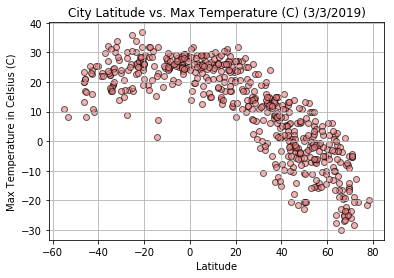

In [215]:
lat_vs_max_temp = plt.scatter(cities_weather_df['Lat'],cities_weather_df['Max Temp'], alpha = 0.6, edgecolors = "black", c = "lightcoral")
plt.grid()
plt.title('City Latitude vs. Max Temperature (C) (3/3/2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in Celsius (C)')
plt.savefig('Lat_MaxTemp_3_3_19.png')


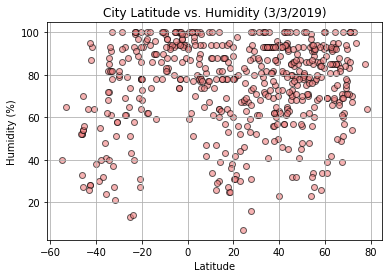

In [216]:
lat_vs_humidity = plt.scatter(cities_weather_df['Lat'],cities_weather_df['Humidity'], alpha = 0.6, edgecolors = "black", c = "lightcoral")
plt.grid()
plt.title('City Latitude vs. Humidity (3/3/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Lat_Humidity_3_3_19.png')



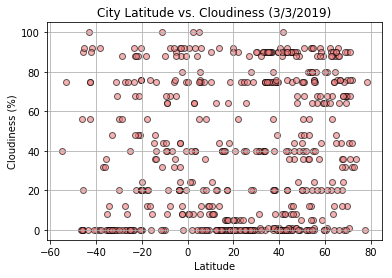

In [217]:
lat_vs_humidity = plt.scatter(cities_weather_df['Lat'],cities_weather_df['Cloudiness %'], alpha = 0.6, edgecolors = "black", c = "lightcoral")
plt.grid()
plt.title('City Latitude vs. Cloudiness (3/3/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Lat_Cloudiness_3_3_19.png')

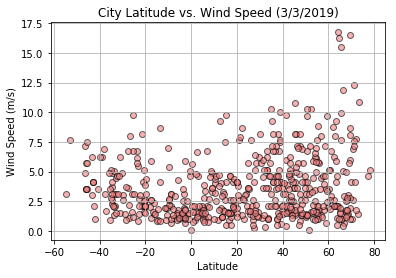

In [218]:
lat_vs_humidity = plt.scatter(cities_weather_df['Lat'],cities_weather_df['Wind Speed'], alpha = 0.6, edgecolors = "black", c = "lightcoral")
plt.grid()
plt.title('City Latitude vs. Wind Speed (3/3/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.savefig('Lat_WindSpeed_3_3_19.png')

Results - Observable Trends:

* There is a trend of temperature increasing in locations closer to the equator and peaking at the equator.
* based on this random sample of cities, there is no trend that can be drawn from latitudes affecting humidity percentages, but there is a trend that shows most of the cities regardless of latitiude location, have high humidity.
* there is a trend of cloudiness on the 0, 80,90% cloudiness across all latitudes.
* there is relatively low wind speeds between (0 to 5 m/s) in the majority of the cities accross all the latitudes.

limitations and considerations to this method and analysis include the following:
* The randomly generated x,y coordinates limits the 'spread' of random sampling that may not be fully representing a more uniform distribution of cities around the world, therefore, this influences the results of trends.
* To increase the probably of the trends, increase the sample size and broaden the x,y coordinates generation parameters.
